<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0526/0526_04_2_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B2%A1%ED%84%B0(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 단어의 표현 (Word Representation)

### 1.1 One-Hot Encoder

#### 1) 직접 구현

"원숭이, 바나나, 사과"로 원핫인코딩을 한다면 

In [ ]:
#인코딩 대상 단어들을 담은 리스트 
word_ls = ['원숭이','바나나','사과','사과'] 

In [ ]:
def one_hot_encoder(word_ls):
    pass



In [ ]:
one_hot_vectors = one_hot_encoder(word_ls)
one_hot_vectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

"코끼리라는 단어가 추가된다면?"

In [ ]:
word_ls = ['원숭이','바나나','사과','코끼리']

one_hot_vectors = one_hot_encoder(word_ls)
one_hot_vectors

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### 2) sklearn 활용

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 예제 데이터 배열
values = array(word_ls)
print(values)

['원숭이' '바나나' '사과' '코끼리']
[2 0 1 3]


##### 라벨 인코딩하기

In [ ]:
# 라벨 인코더 객체 만들기
label_enc = 

# 변환하기
int_enc = 
print(int_enc)

##### 원핫인코딩하기

In [ ]:
# 원핫인코더 객체 생성하기
onehot_enc = OneHotEncoder(sparse=False) 


# 배열 형변환하기
temp = values.reshape(len(values), 1) # n:1 matrix로 변환
print(temp)

# 배열 원핫인코딩 적용하기
onehot_enc = 


[['원숭이']
 ['바나나']
 ['사과']
 ['코끼리']]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
# one-hot encoding 의 첫번째 배열을 값을 역으로 산출
inverted = 

['원숭이']


In [ ]:
onehot_enc[0, :]

array([0., 0., 1., 0.])

In [ ]:
argmax(onehot_enc[0, :])

2

In [ ]:
label_enc.inverse_transform([argmax(onehot_enc[0, :])])

array(['원숭이'], dtype='<U3')

### 1.2 단어 임베딩(Word Embedding)

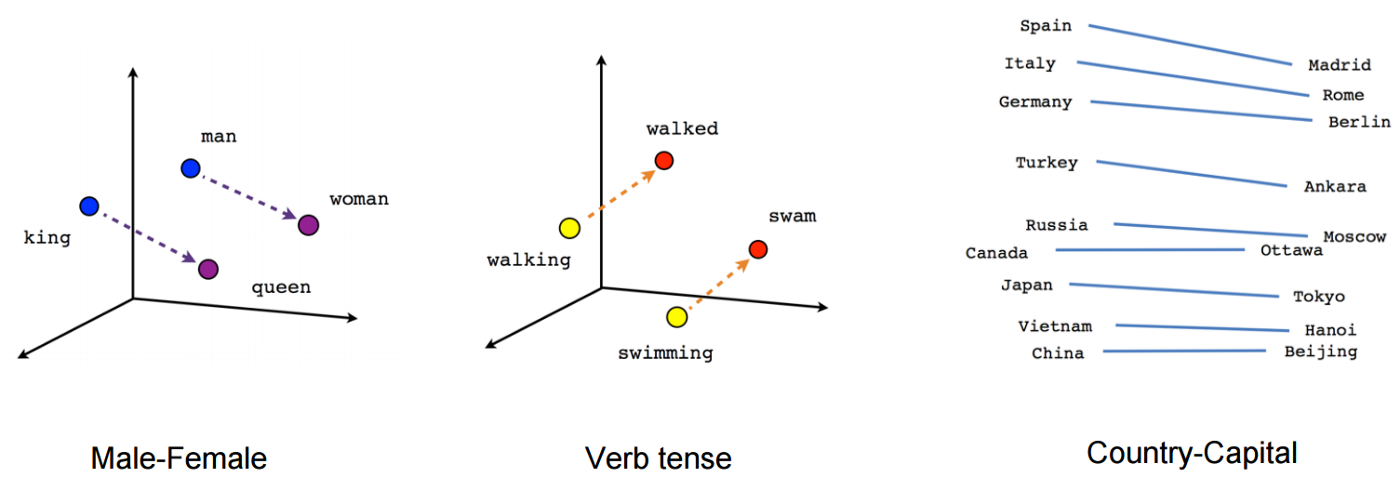

직접 학습을 시키면 좋겠지만, 인공망을 학습시킬 자원과 시간이 부족하므로, 이미 학습된 word vector들을 불러와 살펴보겠습니다. 

In [ ]:
# gensim : Word2Vec으로 사전 학습된 임베딩 벡터를 쉽게 사용해볼 수 있는 패키지

### (시작하기 전에) gensim 패키지를 최신 버전으로 업그레이드
# !pip install gensim --upgrade

In [ ]:
### 미리 학습된 word2vec 벡터 다운
import gensim.downloader as api
wv = api.load('glove-twitter-25')
wv

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
### wv : 0 ~ 9 인덱스에 위치한 단어가 무엇인지 확인
for idx, word in enumerate(wv.index2entity):
    if idx == 10:
        break

    print(f"word #{idx}/{len(wv.index2entity)} is '{word}'")

word #0/1193514 is '<user>'
word #1/1193514 is '.'
word #2/1193514 is ':'
word #3/1193514 is 'rt'
word #4/1193514 is ','
word #5/1193514 is '<repeat>'
word #6/1193514 is '<hashtag>'
word #7/1193514 is '<number>'
word #8/1193514 is '<url>'
word #9/1193514 is '!'


In [ ]:
### 임베딩 벡터의 차원과 값
# king이라는 단어의 벡터의 shape을 출력하여 임베딩 벡터의 차원 확인
vec_king = wv['king']

print(f"Embedding dimesion is : {vec_king.shape}\n")
print(f"Embedding vector of 'king' is \n\n {vec_king}")

Embedding dimesion is : (25,)

Embedding vector of 'king' is 

 [-0.74501  -0.11992   0.37329   0.36847  -0.4472   -0.2288    0.70118
  0.82872   0.39486  -0.58347   0.41488   0.37074  -3.6906   -0.20101
  0.11472  -0.34661   0.36208   0.095679 -0.01765   0.68498  -0.049013
  0.54049  -0.21005  -0.65397   0.64556 ]


In [ ]:
### 말뭉치에 등장하지 않는 단어의 임베딩 벡터
# 말뭉치에 등장하지 않는 단어(Unknown token)
unk = 'covid19'

try:
    vec_unk = wv[unk]
except KeyError:
    print(f"The word #{unk} does not appear in this model")


The word #covid19 does not appear in this model


In [ ]:
### 단어 간 유사도 파악 : .similarity
#원-핫 인코딩과 다르게 임베딩 벡터는 단어 간 유사도가 0이 아닌 값으로 나온다.
pairs = [
    ('car', 'minivan'),   
    ('car', 'bicycle'),  
    ('car', 'airplane'),
    ('car', 'cereal'),    
    ('car', 'democracy')
]

for w1, w2 in pairs:
    print(f'{w1} ======= {w2}\t  {wv.similarity(w1, w2):.2f}')

car ======= minivan	  0.50
car ======= bicycle	  0.70
car ======= airplane	  0.73
car ======= cereal	  0.54
car ======= democracy	  0.38


In [ ]:
### 가장 유사한 n개의 단어 : .most_similar
# 'car'벡터에 'minivan' 벡터를 더한 벡터와 가장 유사한 5개의 단어
for i, (word, similarity) in enumerate(wv.most_similar(positive=['car', 'minivan'], topn=5)):
    print(f"Top {i+1} : {word}, {similarity}")

Top 1 : truck, 0.9217724204063416
Top 2 : cab, 0.9050741791725159
Top 3 : parked, 0.8964848518371582
Top 4 : passenger, 0.8858598470687866
Top 5 : wheelchair, 0.8818767070770264


In [ ]:
### 가장 관계 없는 단어 : .doesnt_match 
# ['fire', 'water', 'land', 'sea', 'air', 'car'] 중에서 가장 관계 없는 단어 뽑기
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

sea


## 2. 문서의 표현 (Document Representation)

### 2.1 Bag of Words

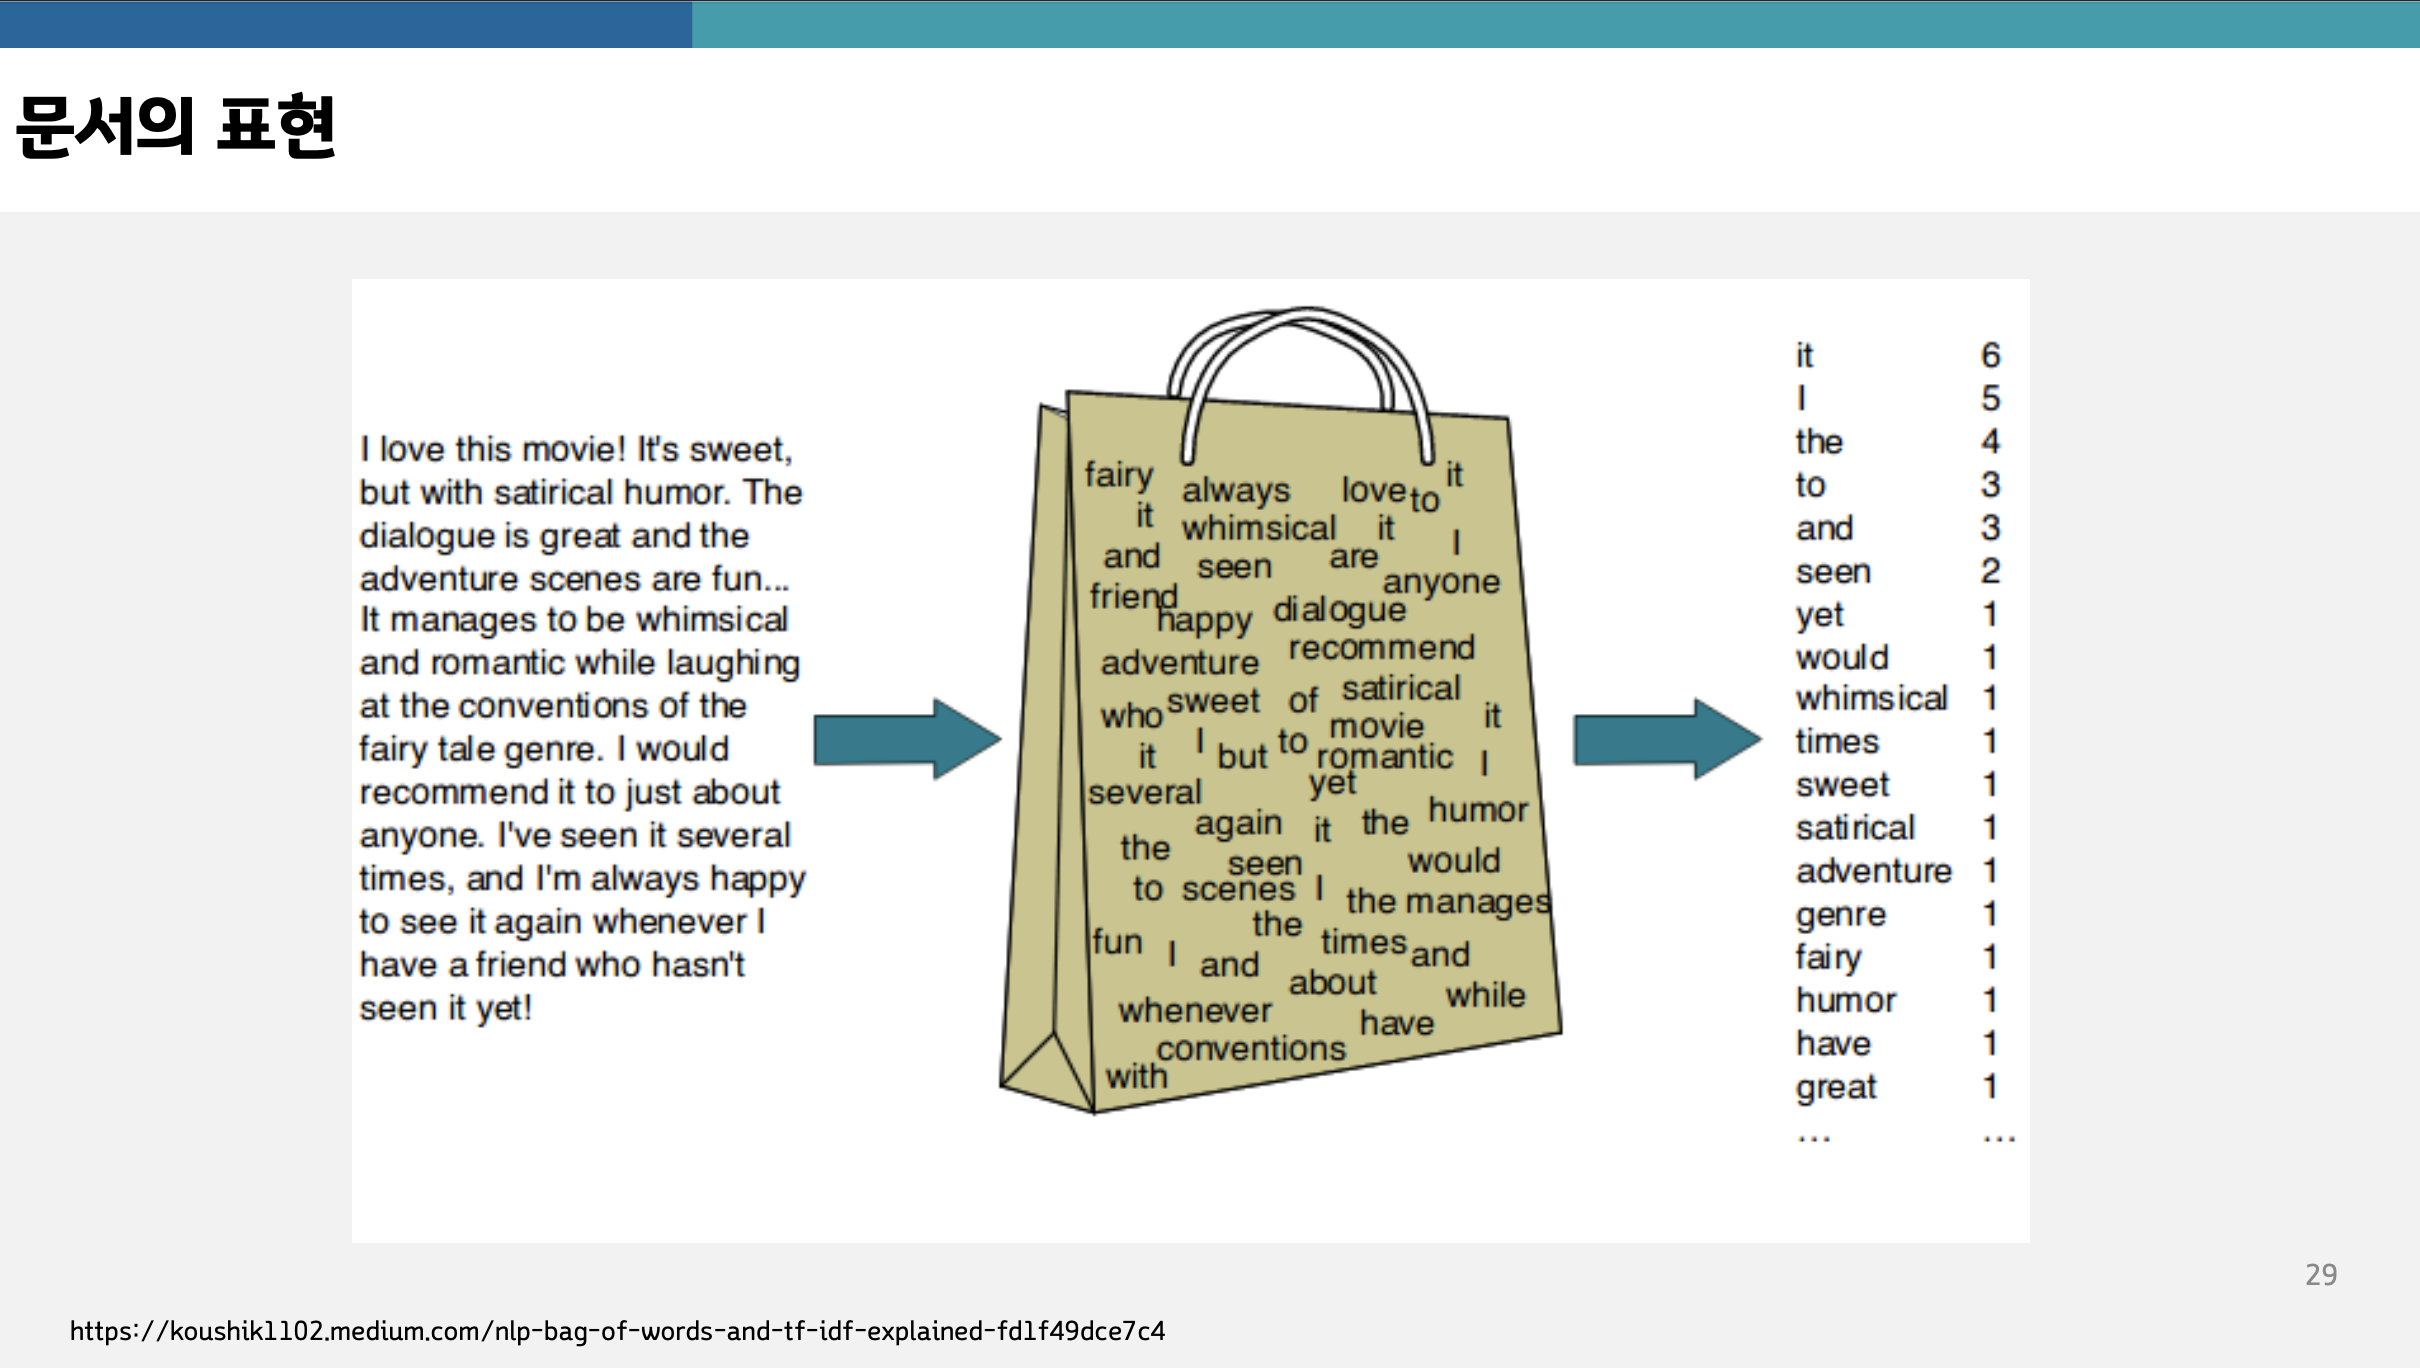

문서 1: '오늘 동물원에서 원숭이를 봤어'   
문서 2: '오늘 동물원에서 코끼리를 봤어 봤어'   
문서 3: '동물원에서 원숭이에게 바나나를 줬어 바나나를'   

#### 2.1.1 직접구현 
##### 각각의 문장이 열과 행으로 만들어진다
##### row(행)은 문장 개수, cloumn(열)은 유효한 토큰의 개수

In [ ]:
import pandas as pd

In [ ]:
docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

In [ ]:
# unique한 토큰의 개수 + unique한 토큰으로 인덱스 지정 
## 카운팅을 위해 자리 지정이 필요 

#1. 토큰 목록을 만든다
#2. unique한 토큰만 남긴다
#3. 자리 지정

In [1]:
# 토크나이저 이용하는 방법
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from konlpy.tag import Okt
tokenizer = Okt()

In [3]:
txt =  "안녕하세요 이소연입니다"
tokenizer.morphs(txt)

['안녕하세요', '이소연', '입니다']

In [ ]:
# unique한 토큰 개수 + 인덱스 지정 (3, 4, 5 번은 꼭 알아두자)
# 중요한 것은 bow에 뭐가 들어가는가
import numpy as np 

docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

# 1. 토큰 목록 
token_ls = []
for doc in docs:
    token_ls.extend(tokenizer.morphs(doc))
print('token 목록 :', token_ls)

# 2. unique한 것만 남기기
token_ls = list(set(token_ls))
print('unique한 토큰 목록 : ', token_ls)

# 3. 자리 지정 
word2idx = { word : idx for idx, word in enumerate(token_ls)}
print('자리 지정 : ', word2idx)

# 4. 빈 행렬 - 0으로 채워진 행렬 
bow_np = np.zeros((len(docs), len(token_ls))) 

# 5. 문서별로 토큰 카운팅 
for i, doc in enumerate(docs): 
    for word in tokenizer.morphs(doc):
        bow_np[i, word2idx[word]] += 1
bow_np

In [ ]:
# 띄어쓰기 단위로 토큰화

text = []
for i in docs:
    noum = i.split(' ')
    text.append(noum)
text

[['오늘', '동물원에서', '원숭이를', '봤어'],
 ['오늘', '동물원에서', '코끼리를', '봤어', '봤어'],
 ['동물원에서', '원숭이에게', '바나나를', '줬어', '바나나를']]

In [ ]:
# 각 고유 토큰에 인덱스를 지정
docs_dic = {}
for i in text:
    for j in i:
        if j not in docs_dic:
            docs_dic[j] = 1
        else:
            docs_dic[j] += 1
docs_dic

{'오늘': 2,
 '동물원에서': 3,
 '원숭이를': 1,
 '봤어': 3,
 '코끼리를': 1,
 '원숭이에게': 1,
 '바나나를': 2,
 '줬어': 1}

In [ ]:
# 띄어쓰기 단위로 토큰화
doc_ls = [doc.split() for doc in docs]
doc_ls 

[['오늘', '동물원에서', '원숭이를', '봤어'],
 ['오늘', '동물원에서', '코끼리를', '봤어', '봤어'],
 ['동물원에서', '원숭이에게', '바나나를', '줬어', '바나나를']]

In [ ]:
# 중복을 제거하고 워드 리스트 
words = []

for doc in doc_ls:
    words.extend(doc)

words = list(set(words))

word2idx = {word:idx for idx, word in enumerate(words)}
word2idx

{'원숭이에게': 0,
 '바나나를': 1,
 '오늘': 2,
 '줬어': 3,
 '코끼리를': 4,
 '봤어': 5,
 '동물원에서': 6,
 '원숭이를': 7}

In [ ]:
# 같은 코드
words = sum(doc_ls, [])

for doc in doc_ls:
    words.extend(doc)

words = list(set(words))

word2idx = {word:idx for idx, word in enumerate(words)}
word2idx

{'원숭이에게': 0,
 '바나나를': 1,
 '오늘': 2,
 '줬어': 3,
 '코끼리를': 4,
 '봤어': 5,
 '동물원에서': 6,
 '원숭이를': 7}

In [ ]:
# BoW 생성
import numpy as np
bow_np = np.zeros((len(docs), len(words))) # 3, 8인 행렬만들고 
# np.zeros로 행렬만드는 것 많이 나온다, 알아두자
bow_np

# 리스트를 한 번씩 돈다
for i, doc in enumerate(doc_ls):
    print(f'{i}번째 문서 : {doc}') # 문서 돌고 
    for word in doc:
        print(f'\t{word2idx[word]}번째 단어 : {word}') # 문서 안의 단어 돈다
        bow_np[i, word2idx[word]] += 1
bow_np

0번째 문서 : ['오늘', '동물원에서', '원숭이를', '봤어']
	2번째 단어 : 오늘
	6번째 단어 : 동물원에서
	7번째 단어 : 원숭이를
	5번째 단어 : 봤어
1번째 문서 : ['오늘', '동물원에서', '코끼리를', '봤어', '봤어']
	2번째 단어 : 오늘
	6번째 단어 : 동물원에서
	4번째 단어 : 코끼리를
	5번째 단어 : 봤어
	5번째 단어 : 봤어
2번째 문서 : ['동물원에서', '원숭이에게', '바나나를', '줬어', '바나나를']
	6번째 단어 : 동물원에서
	0번째 단어 : 원숭이에게
	1번째 단어 : 바나나를
	3번째 단어 : 줬어
	1번째 단어 : 바나나를


array([[0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 1., 2., 1., 0.],
       [1., 2., 0., 1., 0., 0., 1., 0.]])

In [ ]:
# BoW 생성


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# 시각화 
sorted_vocab = sorted((value, key) for key, value in word2id.items()) #인덱스에 따라 정렬
vocab = [v[1] for v in sorted_vocab]

for i in range(len(docs)):
  print("문서{} : {}".format(i, docs[i]))
  pd.DataFrame([BoW_ls[i]], columns = vocab)

문서0 : 오늘 동물원에서 원숭이를 봤어


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,1,1,1,1,0,0,0,0





문서1 : 오늘 동물원에서 코끼리를 봤어 봤어


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,1,1,0,2,1,0,0,0





문서2 : 동물원에서 원숭이에게 바나나를 줬어 바나나를


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,0,1,0,0,0,1,2,1


________
####단어 순서를 고려하지 않은 BoW
##### 단어 순서를 고려하지 않기 때문에 빈도수가 같으면 같다고 여긴다

In [5]:
docs = ['나는 양념 치킨을 좋아해 하지만 후라이드 치킨을 싫어해',
        '나는 후라이드 치킨을 좋아해 하지만 양념 치킨을 싫어해']

In [ ]:
# 띄어쓰기 단위로 토큰화

docs_ls = [x.split() for x in docs ]
docs_ls

[['나는', '양념', '치킨을', '좋아해', '하지만', '후라이드', '치킨을', '싫어해'],
 ['나는', '후라이드', '치킨을', '좋아해', '하지만', '양념', '치킨을', '싫어해']]

In [ ]:
# 각 고유 토큰에 인덱스 지정


defaultdict(<function __main__.<lambda>()>,
            {'나는': 0,
             '양념': 1,
             '치킨을': 2,
             '좋아해': 3,
             '하지만': 4,
             '후라이드': 5,
             '싫어해': 6})

In [ ]:
# BoW생성


[array([1, 1, 2, 1, 1, 1, 1]), array([1, 1, 2, 1, 1, 1, 1])]

In [ ]:
sorted_vocab = sorted((value, key) for key, value in word2id.items())
vocab = [v[1] for v in sorted_vocab]
for i in range(len(docs)) :
  print("문서{} : {}".format(i, docs[i]))
  pd.DataFrame([BoW_ls[i]], columns=vocab)

문서0 : 나는 양념 치킨을 좋아해 하지만 후라이드 치킨을 싫어해


,나는,양념,치킨을,좋아해,하지만,후라이드,싫어해
0,1,1,2,1,1,1,1





문서1 : 나는 후라이드 치킨을 좋아해 하지만 양념 치킨을 싫어해


,나는,양념,치킨을,좋아해,하지만,후라이드,싫어해
0,1,1,2,1,1,1,1


#### 2.1.2 sklearn 활용

In [9]:
docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# 객체생성
count_vext = CountVectorizer()
# 변환하기
Bow = count_vext.fit_transform(docs)
Bow

# sparse : 희소하다 >> sparse matrix : 0이 많은 행렬이다 >> 컴퓨터가 보여주지 않고 따로 저장해둔다
# sparse matrix : array로 변환하면 볼 수 있다

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [12]:
# get_feature_names_out : 각각의 컬럼이 어떤 토큰인지 알 수 있다
count_vext.get_feature_names_out()

array(['동물원에서', '바나나를', '봤어', '오늘', '원숭이를', '원숭이에게', '줬어', '코끼리를'],
      dtype=object)

In [11]:
Bow.toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 2, 1, 0, 0, 0, 1],
       [1, 2, 0, 0, 0, 1, 1, 0]])

In [ ]:
# 시각화하기
vocab = count_vect.get_feature_names()
for i in range(len(docs)) :
  print("문서{} : {}".format(i, docs[i]))
  pd.DataFrame([BoW.toarray()[i]], columns=vocab)

문서0 : 오늘 동물원에서 원숭이를 봤어


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,0,1,1,1,0,0,0





문서1 : 오늘 동물원에서 코끼리를 봤어 봤어


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,0,2,1,0,0,0,1





문서2 : 동물원에서 원숭이에게 바나나를 줬어 바나나를


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,2,0,0,0,1,1,0


### 2.2 TF-IDF

#### 2.2.1 직접구현

$$tfidf(t, d, D) = tf(t, d)*idf(t, D) $$

*  TF(단어 빈도, Term Frequency) : 단어가 문서 내에 등장하는 빈도
*  IDF(역문서 빈도, Inverse Document Frequency) : 단어가 여러 문서에 공통적으로 등장하는 빈도

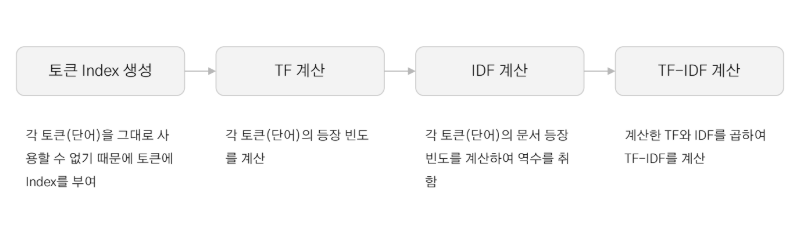

weighting schema|weight
--|--
tf (term frequency)|<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/91699003abf4fe8bdf861bbce08e73e71acf5fd4" />
idf(inverse document frequency) |<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/864fcfdc0c16344c11509f724f1aa7081cf9f657" />

#### 2.2.2 sklearn

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
#tfidf.fit_transform(docs).toarray()
doc_tfidf = tfidf.fit_transform(docs)
doc_tfidf.toarray()
# 내 문서에서만 많이 등장할 수록 TF_IDF 가중치가 늘어난다 = 값이 늘어난다

array([[0.37311881, 0.        , 0.4804584 , 0.4804584 , 0.63174505,
        0.        , 0.        , 0.        ],
       [0.28680065, 0.        , 0.73861611, 0.36930805, 0.        ,
        0.        , 0.        , 0.48559571],
       [0.2344005 , 0.79374908, 0.        , 0.        , 0.        ,
        0.39687454, 0.39687454, 0.        ]])

array([1.        , 1.69314718, 1.28768207, 1.28768207, 1.69314718,
       1.69314718, 1.69314718, 1.69314718])

In [ ]:
from IPython import display as ICD

vocab = count_vect.get_feature_names_out()
for i in range(len(docs)) :
  print("문서{} : {}".format(i, docs[i]))
  ICD.display(pd.DataFrame([doc_tfidf.toarray()[i]], columns=vocab))
  print("\n\n")

문서0 : 오늘 동물원에서 원숭이를 봤어


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,0.373119,0.0,0.480458,0.480458,0.631745,0.0,0.0,0.0





문서1 : 오늘 동물원에서 코끼리를 봤어 봤어


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,0.286801,0.0,0.738616,0.369308,0.0,0.0,0.0,0.485596





문서2 : 동물원에서 원숭이에게 바나나를 줬어 바나나를


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,0.2344,0.793749,0.0,0.0,0.0,0.396875,0.396875,0.0


### 참고
- https://intrepidgeeks.com/tutorial/n422-natural-language-processing-word-dispersion